
# Convolutional Neural Networks

Today's class will be given with the following plan:


1.   Motivation
2.   What is a CNN?
3.   Further Intuition
3.   Preparing the data
4.   Building a CNN
5.   Training and evaluation
6.    Saving the model for reuse



- https://medium.freecodecamp.org/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050


## 1. Motivation
Convolutional Neural Networks are responsible for some of the most advanced advancements in Deep Learning.  Here's some examples of complex structures that can be extracted by using convolutional neural networks ([source](https://arxiv.org/pdf/1311.2901.pdf)):
![](https://cdn-images-1.medium.com/max/1400/1*TopKS7puyHfrmPohXseLAQ.png)



## 2. What's a CNN?
Here's the traditional way that neural networks work:

![1*vlgEOOMh9UcWkRsX7OniJQ.gif](https://cdn-images-1.medium.com/max/1600/1*vlgEOOMh9UcWkRsX7OniJQ.gif)

When the input is images, there are two main problems:
- The information regarding close pixels is not preserved
- The number of inputs is very big

In order to handle both problems, we can use Convolutional Neural Networks. The way it works can be summarized as follows:

![](https://ahmedbesbes.com/images/GIF.gif)

It's strategy is based on convolutional transformations. Convolution is like a 'filter' that's applied to an image in order to extract features. Mathematically, it is a matrix that is multiplied to the original image and then averaged. Here's an example of convolution being applied to a matrix:

![](https://santexgroup.com/wp-content/uploads/2018/01/stride2.gif)

Kernel is a matrix (usually 3X3) with values that defines the type of translation to be performed. Here are some examples of kernels:
![](https://santexgroup.com/wp-content/uploads/2018/01/Screen-Shot-2018-01-11-at-12.22.38-PM.png)

So basically the operation is performed through all pixels around the image. They are multiplied by the kernel's value and then summed. Here's a visual example for edge detection:

![](https://media.giphy.com/media/4VWs21TCbpO14haseT/giphy.gif)


You can further play [here](http://setosa.io/ev/image-kernels/). The previous example is for a black and white image which can be represented by a 2D matrix. But what about colorful images? In colorful images, we actually have 3 bi-dimentional matrices (RGB for example). Hence, the convolution, becomes 3D. Here's an example:
![](https://cdn-images-1.medium.com/max/800/1*_34EtrgYk6cQxlJ2br51HQ.gif)


Those convolutions are combined with a very simple strategy to reduce the matrices dimension called [maxpooling]():

![](https://developers.google.com/machine-learning/practica/image-classification/images/maxpool_animation.gif)

In short, maxpooling is going to declare a filter in which the maximum value is extracted for each grid. In the end, the idea is to reduce the image to an array indicating the presence or not of given features:

![](https://cdn-images-1.medium.com/max/1200/1*XbuW8WuRrAY5pC4t-9DZAQ.jpeg)

This should be learn't by the computer itself without any inference from a human.

https://www.quora.com/How-are-convolutional-filters-kernels-initialized-and-learned-in-a-convolutional-neural-network-CNN

## 3. Further Intuition
Please refer to [this link](https://docs.google.com/spreadsheets/d/1cTjEggPifr9AfymmGEsA9eHlqXzUNu20_JszRR6j_lI/edit#gid=764381460) for a visual explanation using Google Sheets. 






## 4. Practical Example: MNIST Dataset
### 4.1 Preparing the input data
- Import
- Have a look in the dataset

In [0]:
from keras.datasets import mnist

# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
print("Shape of the training set: {}".format(X_train.shape))
print("Shape of the test set: {}".format(X_test.shape))


Shape of the training set: (60000, 28, 28)
Shape of the test set: (10000, 28, 28)


In [0]:
y_train[IDX]

5

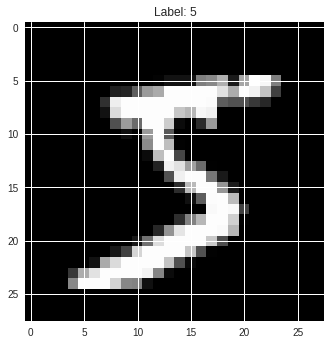

In [0]:
# Now, let's visualize some digits from the training set:
import matplotlib.pyplot as plt
import numpy as np
for IDX in range(1):
  plt.imshow(X_train[IDX], cmap='gray')
  plt.title("Label: {}".format(y_train[IDX]))
  plt.show()

Let's now normalize the data:

In [0]:
# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

Normalisation is required so that all the inputs are at a comparable range.
Say there are two inputs to your ann, x1 and x2. x1 varies from to 0 to 0.5 and x2 varies from 0 to 1000. A change of x1 of 0.5  is 100 percent change where as a change of x2 by 0.5 is only a change of 0.05%. Hence normalization helps

### 4.2 Training with a simple MLP first

In [0]:
from keras.models import Sequential

from keras.layers import Input, Dense, Conv2D


##model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))

NameError: ignored

In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam')#,
              #loss='sparse_categorical_crossentropy',
              #metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
score = model.evaluate(x_test, y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

ValueError: ignored

### 4.3 Extending to CNNs

In [0]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=10)


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 45000 samples, validate on 15000 samples
Epoch 1/12
45000/45000 [==============================] - 9s 190us/step - loss: 0.3186 - acc: 0.9023 - val_loss: 0.0840 - val_acc: 0.9741
Epoch 2/12
45000/45000 [==============================] - 8s 179us/step - loss: 0.1045 - acc: 0.9693 - val_loss: 0.0785 - val_acc: 0.9759
Epoch 3/12
45000/45000 [==============================] - 8s 178us/step - loss: 0.0761 - acc: 0.9772 - val_loss: 0.0477 - val_acc: 0.9859
Epoch 4/12
45000/45000 [==============================] - 8s 179us/step - loss: 0.0603 - acc: 0.9818 - val_loss: 0.0439 - val_acc: 0.9877
Epoch 5/12
45000/45000 [==============================] - 8s 180us/step - loss: 0.0524 - acc: 0.9838 - val_loss: 0.0403 - val_acc: 0.9875
Epoch 6/12
45000/45000 [==============================] - 8s 178us/step - loss: 0.0460 - acc: 0.9860 - val_loss: 0.0452 - val_acc: 0.9877
Epoch 7/12
45000/45000 [=========================

In [0]:
from sklearn.model_selection import train_test_split